# Workshop_1
### Cristian   Camilo Correa  Barrera

Regression Models: Parkinson telemonitoring

Consider the problem stated in: 

https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring  


## Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.

Columns in the table contain subject number, subject age, subject gender, time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 16 biomedical voice measures. Each row corresponds to one of 5,875 voice recording from these individuals. The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around 200 recordings per patient, the subject number of the patient is identified in the first column. For further information or to pass on comments, please contact Athanasios Tsanas (tsanasthanasis '@' gmail.com) or Max Little (littlem '@' physics.ox.ac.uk).

Further details are contained in the following reference -- if you use this dataset, please cite:
Athanasios Tsanas, Max A. Little, Patrick E. McSharry, Lorraine O. Ramig (2009),
'Accurate telemonitoring of Parkinson’s disease progression by non-invasive speech tests',
IEEE Transactions on Biomedical Engineering (to appear).

Further details about the biomedical voice measures can be found in:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2009),
'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease',
IEEE Transactions on Biomedical Engineering, 56(4):1015-1022

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2.1 Data exploration

### Load Data Set

In [237]:
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data'
df = pd.read_csv(url_data)

In [5]:
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


### Describe each variable (maximum, minimum, average, standard deviation, distribution). Do you understand each statistical measure?

In [7]:
df.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


### For each variable, plot its distribution 

array([[<AxesSubplot:title={'center':'subject#'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'test_time'}>,
        <AxesSubplot:title={'center':'motor_UPDRS'}>],
       [<AxesSubplot:title={'center':'total_UPDRS'}>,
        <AxesSubplot:title={'center':'Jitter(%)'}>,
        <AxesSubplot:title={'center':'Jitter(Abs)'}>,
        <AxesSubplot:title={'center':'Jitter:RAP'}>,
        <AxesSubplot:title={'center':'Jitter:PPQ5'}>],
       [<AxesSubplot:title={'center':'Jitter:DDP'}>,
        <AxesSubplot:title={'center':'Shimmer'}>,
        <AxesSubplot:title={'center':'Shimmer(dB)'}>,
        <AxesSubplot:title={'center':'Shimmer:APQ3'}>,
        <AxesSubplot:title={'center':'Shimmer:APQ5'}>],
       [<AxesSubplot:title={'center':'Shimmer:APQ11'}>,
        <AxesSubplot:title={'center':'Shimmer:DDA'}>,
        <AxesSubplot:title={'center':'NHR'}>,
        <AxesSubplot:title={'center':'HNR'}>,
        <Axe

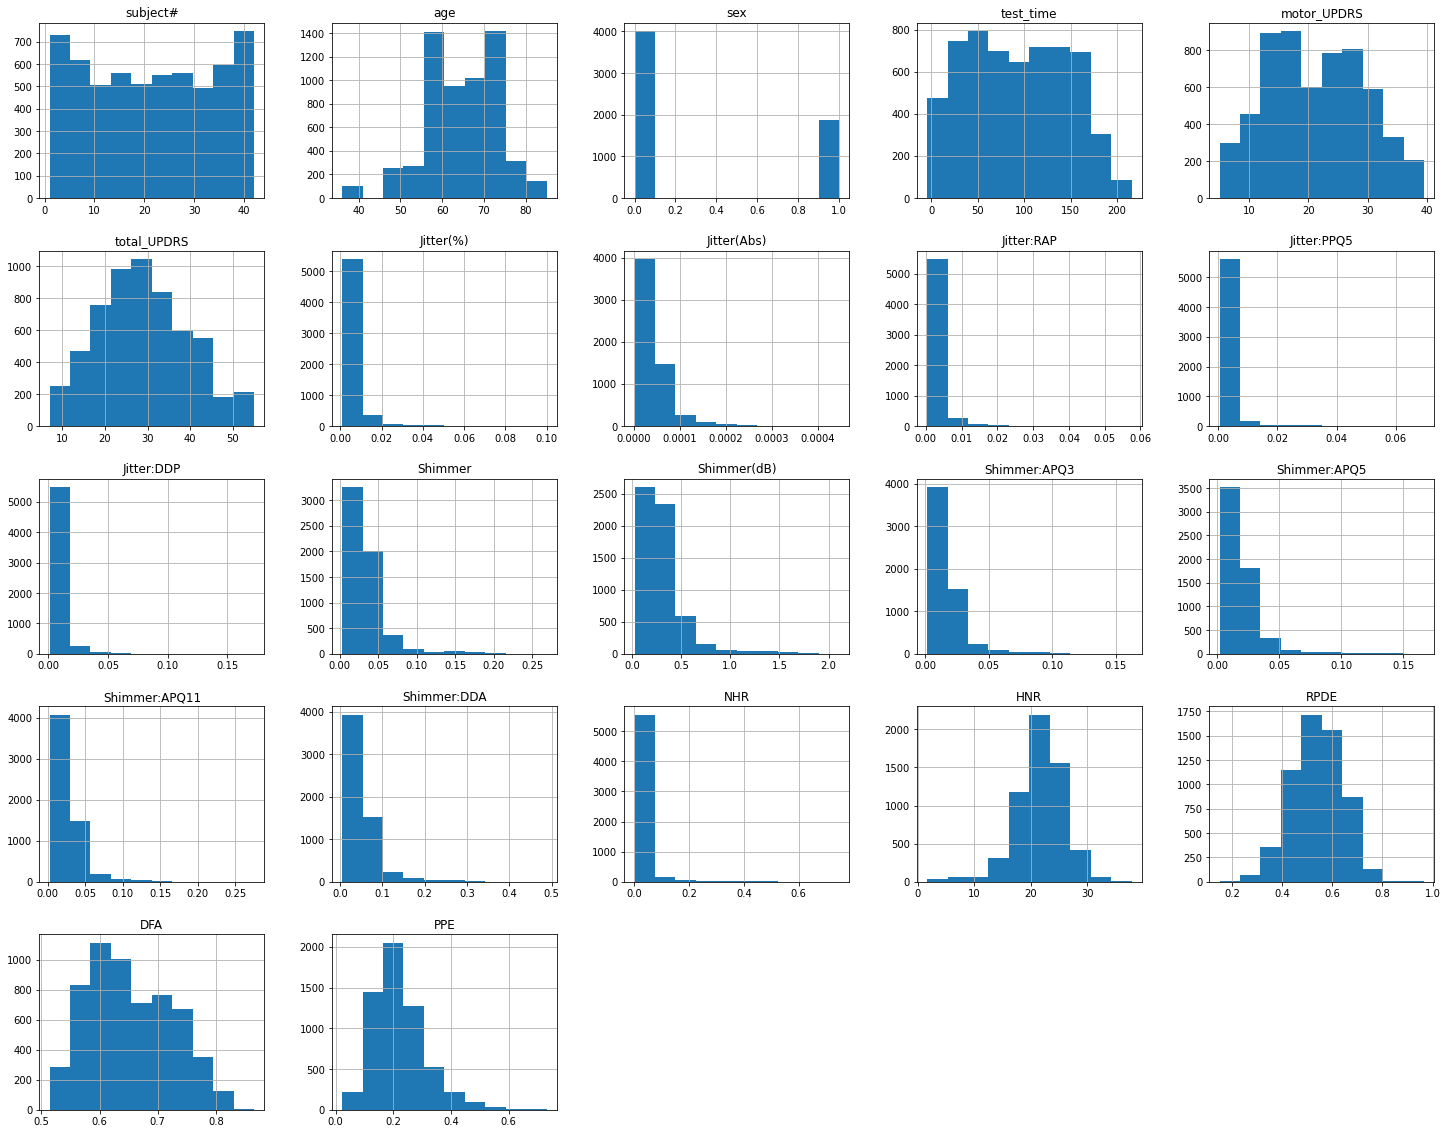

In [10]:
df.hist(bins=10, figsize=(25, 20))

### For each variable, plot its distribution respect to class variables ('motor_UPDRS' and 'total_UPDRS')

In [89]:
len(df.columns)

22

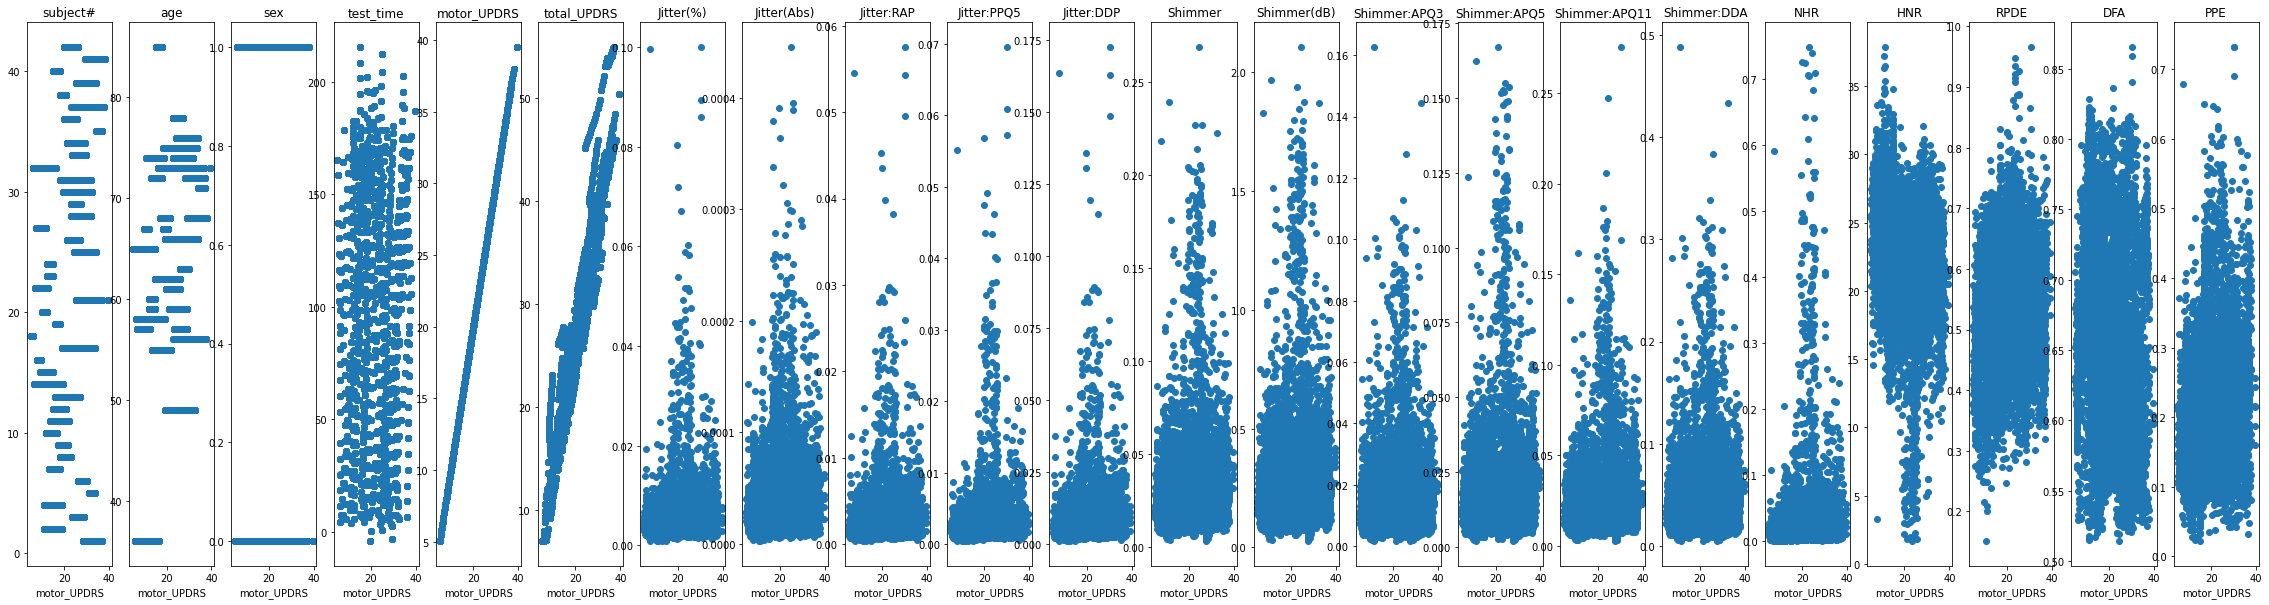

In [105]:

fig, ax = plt.subplots(1, 22, figsize = (40, 10))

for idx, col in enumerate(df.columns, 0):
    ax[idx].plot(df['motor_UPDRS'], df[col], 'o')
    ax[idx].set_xlabel('motor_UPDRS')
    ax[idx].set_title(col)

plt.show()

In [40]:
df.columns[1]

'age'

### Generate the correlation matrix and plot it as heat map. 

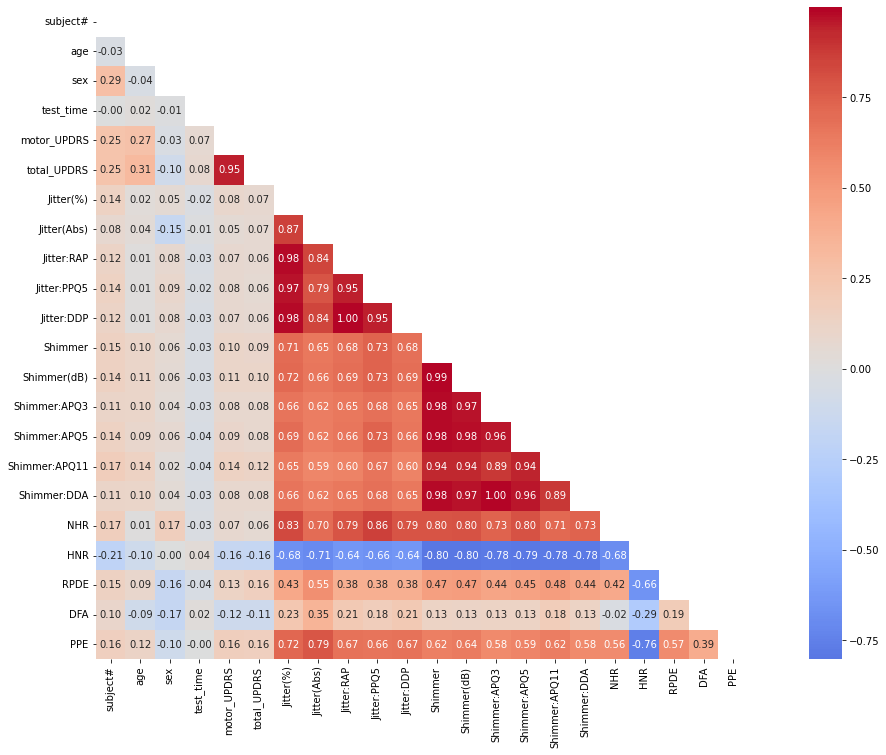

In [21]:
matrix = df.corr()
mask = np.triu(np.ones_like(matrix,dtype='bool'))

plt.figure(figsize=(22,12))
sns.heatmap(matrix,mask=mask,annot=True,center=0,fmt='.2f',square=True,cmap="coolwarm")
plt.show()

## 2.2. Feature Selection

### Split the dataset  in training set and test set

In [187]:
from sklearn.model_selection import train_test_split

In [213]:
X = df.drop(['motor_UPDRS','total_UPDRS'],axis = 1)
y1  = df['motor_UPDRS']
y2  = df['total_UPDRS']

In [214]:
X_train, x_test, y1_train, y1_test = train_test_split(X,y1, test_size=0.3,random_state=0)

X_train, x_test, y2_train, y2_test = train_test_split(X,y2, test_size=0.3,random_state=0)

### Remove unnecessary attributes


In [111]:
df.drop([ 'subject#','age', 'sex', 'test_time'], inplace=True, axis=1)
df.head()
# The porpose is try to predict UPDRS scores from 16 voice measures.

,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


#### The Unified Parkinson's Disease Rating Scale (UPDRS) is a widely applied index of disease severity.
Lets compare the distribution of these

<AxesSubplot:ylabel='Density'>

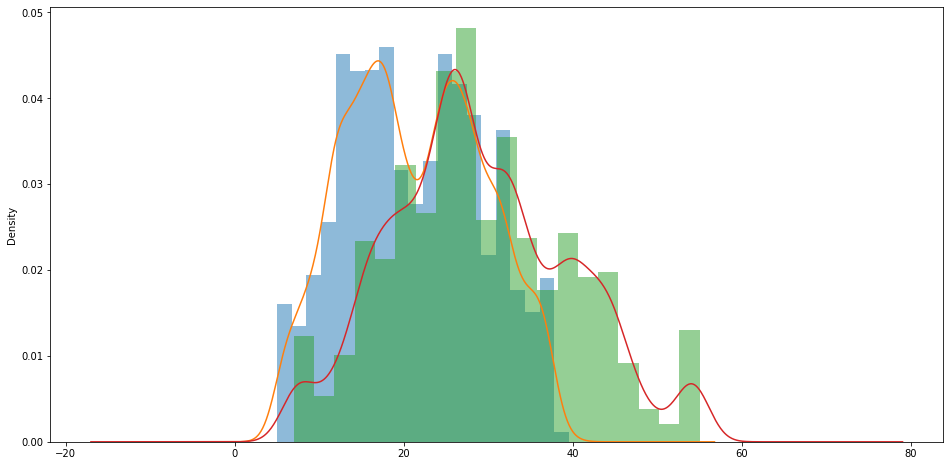

In [13]:
fig,ax = plt.subplots(figsize=(16,8))

df['motor_UPDRS'].plot(kind='hist',alpha=0.5,density=True,bins=20)
df['motor_UPDRS'].plot(kind='kde')


df['total_UPDRS'].plot(kind='hist',alpha=0.5,density=True,bins=20)
df['total_UPDRS'].plot(kind='kde')

In [38]:
df.columns

Index(['motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP',
       'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE',
       'DFA', 'PPE'],
      dtype='object')

### Remove low variance attributes


In [68]:
variances = df.describe()[df.describe().index == 'std' ].transpose()**2

In [72]:
variances.head()
variances.columns

Index(['std'], dtype='object')

In [73]:
variances = variances.reset_index()
variances

,index,std
0,motor_UPDRS,6.608522e+01
1,total_UPDRS,1.144961e+02
2,Jitter(%),3.163194e-05
3,Jitter(Abs),1.294802e-09
4,Jitter:RAP,9.758245e-06
5,Jitter:PPQ5,1.392436e-05
6,Jitter:DDP,8.782483e-05
7,Shimmer,6.674554e-04
8,Shimmer(dB),5.301675e-02
9,Shimmer:APQ3,1.752213e-04


<AxesSubplot:ylabel='Density'>

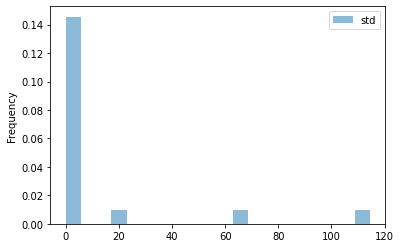

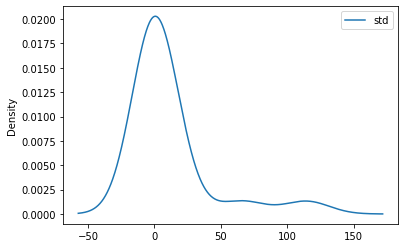

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
# plot.variances()

fig,ax = plt.subplots(figsize=(16,8))

variances.plot(kind='hist',alpha=0.5,density=True,bins=20)
variances.plot(kind='kde')

# sns.scatter(x = 'index', y = 'std', data = variances)

# variances.describe()|

In [83]:
from sklearn.feature_selection import VarianceThreshold

In [262]:
attributes = X_train.columns

selector = VarianceThreshold(threshold=0.01)

selector.fit_transform(X_train)

cols = selector.get_support(indices=True)
attributes = attributes[cols]

print(attributes)

Index(['Shimmer(dB)', 'HNR', 'RPDE'], dtype='object')


### What are the attributes that are most related to the class variable ('motor_UPDRS' and 'total_UPDRS')? Support your response using at least 2 attribute selection methods. 
The most atribute most realated in this two index, are DFA and HNR, they had a They have a very strong consequence, it is negative and inversely proportional.

<AxesSubplot:xlabel='total_UPDRS', ylabel='DFA'>

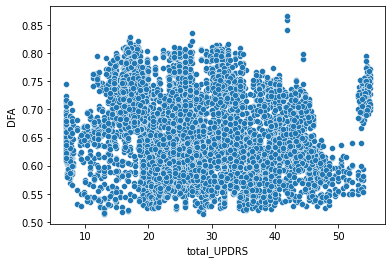

In [143]:
sns.scatterplot(data=df,x='total_UPDRS',y='DFA')


<AxesSubplot:xlabel='total_UPDRS', ylabel='HNR'>

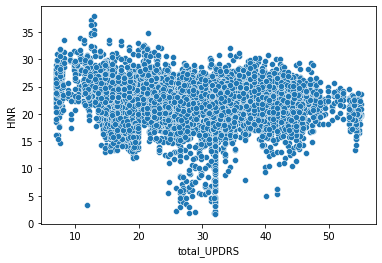

In [144]:
sns.scatterplot(data=df,x='total_UPDRS',y='HNR')

<AxesSubplot:xlabel='total_UPDRS', ylabel='RPDE'>

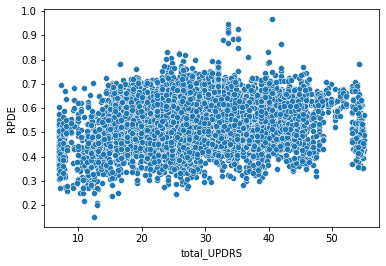

In [162]:
sns.scatterplot(data=df,x='total_UPDRS',y='RPDE')


<AxesSubplot:xlabel='total_UPDRS', ylabel='Shimmer(dB)'>

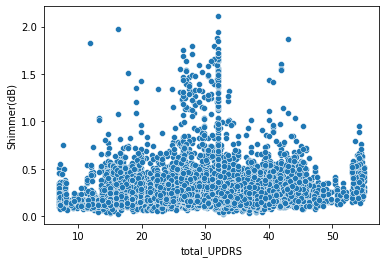

In [238]:
sns.scatterplot(data=df,x='total_UPDRS',y='Shimmer(dB)')

## 2.3.Regression.
Use a Regression technique to predict 'motor_UPDRS' and 'total_UPDRS'. Evaluate the results.

### Split the dataset in training set and test set

In [297]:

from sklearn.model_selection import train_test_split
X = df[attributes]
y1  = df['motor_UPDRS']
y2  = df['total_UPDRS']

X_train, x_test, y1_train, y1_test = train_test_split(X,y1, test_size=0.3,random_state=0)

X_train, x_test, y2_train, y2_test = train_test_split(X,y2, test_size=0.3,random_state=0)

### Train the model on the training set

In [307]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml2=LinearRegression()
ml.fit(X_train,y1_train)
ml2.fit(X_train,y2_train)

LinearRegression()

### Predict the test results

In [308]:
y1_pred=ml.predict(x_test)
y2_pred=ml2.predict(x_test)
# print(y1_pred,y2_pred)

### Evaluate the model

In [309]:
from sklearn.metrics import r2_score
print('y1->',r2_score(y1_test,y1_pred))
print('y2->',r2_score(y2_test,y2_pred))

y1-> 0.022047790277711976
y2-> 0.030533910534805253


### plot the results


Text(0, 0.5, 'Predicted')

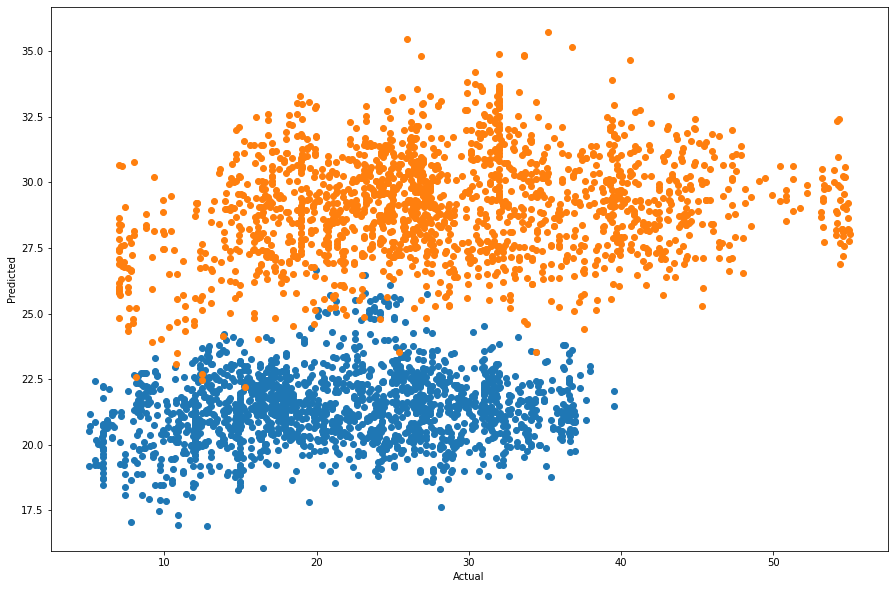

In [310]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y1_test,y1_pred)
plt.scatter(y2_test,y2_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')


### Predicted values 

In [311]:
pred_y_df = pd.DataFrame({'Actual Value Motor':y1_test,'Predicted Value Motor':y1_pred, 'y1 Test-Predicted': y1_test-y1_pred,
                        'Actual Value Total':y2_test,'Predicted Value Total':y2_pred, 'y2 Test-Predicted': y2_test-y2_pred})
pred_y_df[0:20]

,Actual Value Motor,Predicted Value Motor,y1 Test-Predicted,Actual Value Total,Predicted Value Total,y2 Test-Predicted
5588,29.6350,21.981946,7.653054,37.6350,30.064914,7.570086
4802,36.1530,23.813020,12.339980,54.1530,32.349751,21.803249
3060,12.6640,21.265801,-8.601801,26.4430,29.006049,-2.563049
4228,19.1680,23.911272,-4.743272,23.2370,32.350620,-9.113620
5796,21.9880,20.373095,1.614905,32.9880,27.618414,5.369586
5482,16.3280,21.355793,-5.027793,24.6570,28.723282,-4.066282
1666,15.0000,21.484729,-6.484729,21.7150,29.632077,-7.917077
1031,16.4150,21.580365,-5.165365,23.0980,29.569503,-6.471503
1515,18.2340,20.545356,-2.311356,23.1010,27.867682,-4.766682
2029,15.0000,20.083040,-5.083040,21.3710,27.649228,-6.278228


In [317]:
attributes

Index(['Shimmer(dB)', 'HNR', 'RPDE'], dtype='object')

## $motor UPDRS = \beta0 Shimmer(dB) + \beta1 HNR + \beta2 RPDE + \epsilon $ 




In [318]:
print('Motor Coef: ',ml.coef_)
print('Total Coef: ', ml2.coef_)
print('Intercetp: ', ml.intercept_)
print('Intercetp2: ', ml2.intercept_)
# ml.predict(np.array([[3, 5]]))

Motor Coef:  [-1.30563501 -0.29031104  4.40475491]
Total Coef:  [-3.43584199 -0.4036477   9.65389245]
Intercetp:  25.67479139654096
Intercetp2:  33.69010711125426
